# Data Mining 7331 - Fall 2019
## Lab 2 - Classification

* **Allen Ansari**
* **Chad Madding**
* **Yongjun (Ian) Chu**

## Introduction
Cardiovascular diseases (CVD) are the no. 1 cause of death in US each year. To reduce the death rate, the best approach is by early detection and screening. In this Lab we will implemented decision tree, Rainforest ,KNN and Support Vector Machine (SVM) to look at predicting the probability of a patient having CVD based on results from medical examinations, such as blood pressure values and glucose content. The following categories are used for the analysis:

### Data description

We will be performing an analysis of the cardiovascular diseases dataset found on Kaggle (https://www.kaggle.com/sulianova/cardiovascular-disease-dataset). Our analysis will consist of exploring the statistical summaries of the features, visualizing the attributes, and making conclusions from the visualizations and analysis.

Our task is to predict the presence or absence of cardiovascular disease (CVD) using the patient examination results. 

There are 3 types of input features:

- *Objective*: factual information;
- *Examination*: results of medical examination;
- *Subjective*: information given by the patient.

|Feature   |Variable Type   |Variable   |Value Type   |
|:---------|:--------------|:---------------|:------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

For any binary data type, "0" means "No" and "1" means "Yes". All of the dataset values were collected at the moment of medical examination.

### Table of Contents<a id="top"></a>

* **[Data Preparation Part 1](#Data_Preparation_Part_1)**
    * **[10 points]** Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis.
* **[Data Preparation Part 2](#Data_Preparation_Part_2)**
    * **[5 points]** Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).
* **[Modeling and Evaluation 1](#Modeling_and_Evaluation_1)**
    * **[10 points]** Choose and explain your evaluation metrics that you will use (i.e., accuracy, precision, recall, F-measure, or any metric we have discussed). Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions.
* **[Modeling and Evaluation 2](#Modeling_and_Evaluation_2)**
    * **[10 points]** Choose the method you will use for dividing your data into training and testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time.
* **[Modeling and Evaluation 3](#Modeling_and_Evaluation_3)**
    * **[20 points]** Create three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!
* **[Modeling and Evaluation 4](#Modeling_and_Evaluation_4)**
    * **[10 points]** Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.
* **[Modeling and Evaluation 5](#Modeling_and_Evaluation_5)**
    * **[10 points]** Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.
* **[Modeling and Evaluation 6](#Modeling_and_Evaluation_6)**
    * **[10 points]** Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.
* **[Deployment](#Deployment)**
    * **[5 points]** How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would you deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?
* **[Exceptional Work](#Exceptional_Work)**
    * **[10 points]** You have free reign to provide additional analyses. One idea: grid search parameters in a parallelized fashion and visualize the performances across attributes. Which parameters are most significant for making a good model for each classification algorithm?

<a href="#top">Back to Top</a>
### Data_Preparation_Part_1 <a id="Data_Preparation_Part_1"></a>
* we obtained a CVD dataset from Kaggle. It consists of 70,000 records of patient’s data in 12 features, such as age, gender, systolic blood pressure, diastolic blood pressure and CVD status(binary, 1 or 0). The purpose of this dataset was to determine which medical aspects had the most bearing on whether a patient would had CVD or not.

In [1]:
#Import data all necessary libraries we will be using in our estimation

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
import sklearn
import statistics
import random

from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile, RFE, SelectFromModel

from sklearn.preprocessing import StandardScaler, Binarizer

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, auc, roc_curve
from IPython.display import display, HTML

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, TimeSeriesSplit, StratifiedShuffleSplit

from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor,AdaBoostClassifier,RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

matplotlib.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

#Bring in data set
df = pd.read_csv('data/cardio_train.csv', sep= ';') #read in the csv file

# Show the dimension and the first 5 rows of the dataset
print(df.shape)
df.head()

(70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


#### Our data preparation includes following steps:
* Remove the "id" attribute as it is not needed in this assignment
* Inspect each feature for NA values. If more than 75% of the feature contains NA, we replace that field with 0. If less than 75% is NA, then the median value of the column is used to replace the NA
* Check for any categorical variables and using proper methods (like one-hot) to convert them to numerical variables
* Remove all duplicate entries in the dataset
* Search each feature for any outliers and remove them from dataset. We will keep the entries between 97.5% quantile and 2.5% quantile for those features which have outliers or incorrect data 
* Add new variable call Body mass index (BMI) which is commonly used in medical field

In [2]:
# drop 'id' column 
if 'id' in df:
    del df['id']

In [3]:
# Total missing values for each feature
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

We want to see the data type of each column of the CVD dataset and see if there are any categorical variables in the dataset. 

In [4]:
# are there any NA values in the dataset
if df.isnull().values.any():
    print('There are NAs or missing values in the datasets.')
else:
    print('There are no missing values or NAs in the dataset.')        

There are no missing values or NAs in the dataset.


In [5]:
# Are there any non-numbers in each column?
for column in df:
    print(column)
    cnt=0
    for row in df[column]:
        try:
            float(row)
        except ValueError:
            print("there is a non-numeric value: " + row)
            pass
        cnt+=1
        
print(cnt)

age
gender
height
weight
ap_hi
ap_lo
cholesterol
gluc
smoke
alco
active
cardio
70000


All values in the dataset are numeric.

In [6]:
#Are there any duplicate entries in the dataset?
duplicateRowsDF = df[df.duplicated(keep='first')]

print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

print(f"\nThere are {len(duplicateRowsDF)} duplicated entries in the dataset!")


Duplicate Rows except first occurrence based on all columns are :
         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
10562  20495       1     165    70.0    120     80            1     1      0   
21784  16793       1     165    68.0    120     80            1     1      0   
38505  18988       1     164    65.0    120     80            1     1      0   
40365  14552       1     158    64.0    120     80            1     1      0   
42450  18353       1     169    67.0    120     80            1     1      0   
44653  16937       2     170    70.0    120     80            1     1      0   
45125  21280       1     165    65.0    120     80            1     1      0   
45748  22077       1     175    69.0    120     80            1     1      0   
45810  21230       1     164    62.0    120     80            1     1      0   
48917  21945       1     165    60.0    120     80            1     1      0   
50432  17493       2     169    74.0    120     80    

For duplicated entries, we think they were just from mistakes by entering more than once. These 24 entries should be removed.

In [7]:
#remove duplicates in the dataframe
df.drop_duplicates(keep = 'first', inplace = True) 
df.shape

(69976, 12)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,19468.950126,1.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,2467.374620,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


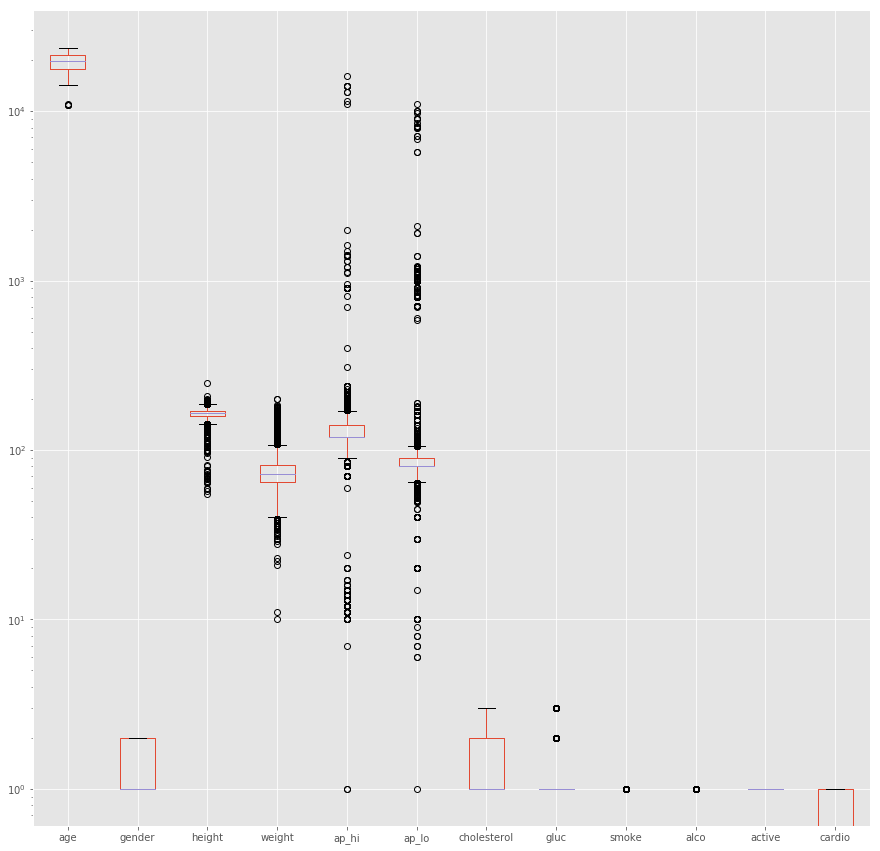

In [8]:
#are there any outliers in the dataset?

#boxplot of all the variables
plt.figure(figsize=(15, 15))
ax = df.boxplot()
ax.set_yscale('log')

df.describe()

From the simple statistical information and the boxplots above, we can easily see that there are some incorrect data points there. For example, the blood pressure has negative readings and the maximum readings for both Systolic blood pressure (ap_hi) and Diastolic blood pressure (ap_lo) are over 10,000, which are obviously mistakes. 

In [9]:
#to only keep the entries between 97.5% quantile and 2.5% quantile for ap_hi and ap_lo
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)
df.shape

(66169, 12)

We also notice that there are some abnormal values in column "weight" and "height". The minimum weight is 10 kg and maximum 200 kg. and the minimum height is 55 cm and maximum is 250 cm. Obviously these values are outliers as they don't represent the values for normal people. So, we decided to remove these by only keeping the values from 2.5 to 97.5 percentile range. 

In [10]:
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)

From above statistics table we realized that age measured in days, for better description we decided to convert age variable to be in years.

In [11]:
df['years'] = (df['age'] / 365).round().astype('int')
if 'age' in df:
    del df['age']

In [12]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
0,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,156,85.0,140,90,3,1,0,0,1,1,55
2,1,165,64.0,130,70,3,1,0,0,0,1,52
3,2,169,82.0,150,100,1,1,0,0,1,1,48
4,1,156,56.0,100,60,1,1,0,0,0,0,48


Body mass index (BMI) is commonly used in medical field. It is a key index for relating weight to height. BMI is a person's weight in kilograms (kg) divided by his or her height in meters squared.

In [13]:
#define BMI
df['BMI'] = df['weight']/((df['height']/100)**2)
# converting BMI range to categorical as 1 = underweight,2 = normal, 3 = overweight and 4 = obese
df['BMI'] = df['BMI'].apply(lambda x: 1 if x<18.5 else(2 if x>=18.5 and x<25 else( 3 if x >= 25 and x < 30 else 4)))

in CDV dataset gender shown as 1 for female and 2 for men. Since this is a binary feature showing these 2 categories as 1 and 2 does not make sense, so we are change the gender levels to be 0 for female and 1 for male.

In [14]:
#change gender levels: 1 to 0 (female) and 2 to 1 (male)
df['gender'] = df['gender'].apply(lambda x:0 if x == 1 else(1))

<a href="#top">Back to Top</a>
### Data Preparation Part 2<a id="Data_Preparation_Part_2"></a>
* Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).

Our final dataset includes 13 features and 60728 entries. 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60728 entries, 0 to 69999
Data columns (total 13 columns):
gender         60728 non-null int64
height         60728 non-null int64
weight         60728 non-null float64
ap_hi          60728 non-null int64
ap_lo          60728 non-null int64
cholesterol    60728 non-null int64
gluc           60728 non-null int64
smoke          60728 non-null int64
alco           60728 non-null int64
active         60728 non-null int64
cardio         60728 non-null int64
years          60728 non-null int32
BMI            60728 non-null int64
dtypes: float64(1), int32(1), int64(11)
memory usage: 6.3 MB


<a href="#top">Back to Top</a>
### Modeling and Evaluation 1<a id="Modeling_and_Evaluation_1"></a>

The purpose of this dataset was to determine which medical aspects had the most bearing on whether a patient would had CVD or not.

A receiver operating characteristic curve, ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied which is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.
A ROC curve can be used to select a threshold for a classifier which maximizes the true positives, while minimizing the false positives.

The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random. Most classifiers have AUCs that fall somewhere between these two values. Therefore, the overall model performances can be compared by considering the AUC.

In addition to ROC-AUC metric, we use the other classification metrics in our models too. 

1- Accuracy: Is the proportion of the total number of predictions that were correct over all kinds predictions made. Accuracy is a good measure when the target variable classes in the data are nearly balanced.

Accuracy = (TP + TN)/(TP + FP + FN + TN)

2- Precision: Which is also called Positive Predictive Value and is the proportion of positive cases that were correctly identified.

Precision = (TP) / (TP + FP)

3- Recall or Sensitivity: Is the proportion of actual positive cases which are correctly identified.

Recall = (TP) / (TP + FN)

Recall gives us information about a model performance with respect to false negatives (how many did we miss), while precision gives us information about its performance with respect to false positives (how many did we caught).

So basically, if we want to focus more on minimizing False Negatives, we would want our Recall to be as close to 100% as possible without precision being too bad and if we want to minimize False positives, then our focus should be to make Precision as close to 100% as possible.


<a href="#top">Back to Top</a>
### Modeling and Evaluation 2<a id="Modeling_and_Evaluation_2"></a>
* Choose the method you will use for dividing your data into training and testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time.

In [16]:
#cardio percentage split
(df['cardio'].value_counts()/len(df))*100

0    50.801937
1    49.198063
Name: cardio, dtype: float64

For this project, CVD dataset will be split into training and test sets as 80/20. For data training, a standard 10-fold cross validation technique are used, in this technique dataset will split into 10 equal sections, train on nine of the sections and score against the last section. This method will cycle through 10 times so that the each of the 10 sections is used as a holdout sample. We chose to shuffle the data during the cross validation to provide a higher confidence there was no grouping of schools that we did not notice.

There is another option available called the Stratified k-fold technique which works to balance the ratio of labels used in each fold. Our dependent variable (cardio) has approximately a 49-51% split (see above), and with a large enough data set we can have a high level of confidence of a random split in the data without using Stratified techniques.

We chose a K fold (10 folds) validation algorithm, however a Shuffle Split may have performed just as well with this size data set. Where Shuffle Split is capable of creating n folds and fitting the data using n-1 to train and 1 to test against, there is a chance the same data will appear in the test set each time the data is sampled. We chose K fold to insure each value is used in the training set.

With the 10-fold cross validation we will be using a grid search technique, which will test a number of different parameters to determine the best final model. Different classification algorithms will have different parameters that can be set, so these will be tested with the grid search method.

Since CVD dataset does not have so many features and it has only 60000 entries dimensionality reduction techniques are not used.

Our basic pipeline includes observation scaling and model classification steps. Observation scaling is a common step for all models. For this step the 'standardscaler' is used, which will scale our variables. This improves our prediction outcomes and makes later feature interpretation significantly easier, since all coefficients will be on the same scale.

The same random seed of 101 is used for all models that take a random state seed to eliminate the variability of getting different results between running our models so that we are able to hold which model is going to be the best model, for later interpretation.

<a href="#top">Back to Top</a>
### Modeling and Evaluation 3<a id="Modeling_and_Evaluation_3"></a>
* Create three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!

For cardio prediction we tried 4 different algorithms to create a model which has superior prediction capabilities based on the ROC/AUC scoring parameter:

* Support Vector Machine (SVM)
* K-Nearest Neighbor
* Decision Tree Classifier
* Random Forest Classification

A ROC/AUC plot will be created for each model and summarized our findings based on the combined results for these different models.

In [17]:
#the pipeline template where we will test for scaling, and classification.
k_fold = KFold(n_splits=10,shuffle=True)
pipe = Pipeline([ ('scale', StandardScaler()), 
                  ('clf', GradientBoostingClassifier())])

To perform a cross validation using the best parameters for the model which it is passed we use below code that borrowed form  Dr. Jake Drew's 2017HighlySegregatedHighSchoolCampuses Jupyter Notebook provided to the class.

In [18]:
from sklearn.model_selection import cross_validate

def EvaluateClassifierEstimator(classifierEstimator, X, y, cv):
   
    #Perform cross validation 
    scores = cross_validate(classifierEstimator, X, y, scoring=['accuracy','precision','recall']
                            , cv=cv, return_train_score=True)

    Accavg = scores['test_accuracy'].mean()
    Preavg = scores['test_precision'].mean()
    Recavg = scores['test_recall'].mean()

    print_str = "The average accuracy for all cv folds is: \t\t {Accavg:.5}"
    print_str2 = "The average precision for all cv folds is: \t\t {Preavg:.5}"
    print_str3 = "The average recall for all cv folds is: \t\t {Recavg:.5}"

    print(print_str.format(Accavg=Accavg))
    print(print_str2.format(Preavg=Preavg))
    print(print_str3.format(Recavg=Recavg))
    print('*********************************************************')

    return scores

In [19]:
#separating input data into two parts X (features) and Y (target)
features = ["gender", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc", "smoke", "alco", "active", "years", "BMI"]

X = df[features].copy()

Y= df[['cardio']].copy()
Y.shape

(60728, 1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

### Model #1 : Support Vector Machine (SVM)

In [21]:
#SVM_SGD 10-fold cross-validation 

param_grid = { 'clf': [SGDClassifier()]
              ,'clf__loss': ['hinge']
              ,'clf__penalty':['l2']
              ,'clf__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
              ,'clf__class_weight': ['balanced', None]
              ,'clf__random_state': [101]
              ,'clf__max_iter':[1000,1500]
              
             }

#Create a grid search object using the above parameters 
from sklearn.model_selection import GridSearchCV
SVMGridSearch = GridSearchCV(pipe, param_grid=param_grid, cv=k_fold,n_jobs=8, verbose=1, scoring='roc_auc' )

#Perform hyperparameter search to find the best combination of parameters for our data
SVMGridSearch.fit(X_train,y=y_train)


Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    6.6s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   12.9s
[Parallel(n_jobs=8)]: Done 280 out of 280 | elapsed:   16.2s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        GradientBoostingClassifier(criterion='friedman_mse',
                                                                   init=None,
                                                                   learning_rate=0.1,
                                                                   loss='deviance',
                                                                   max_depth=3,
                                                                   max_features=None,
                            

In [22]:
classifierEstimaterSVM =SVMGridSearch.best_estimator_
classifierEstimaterSVM

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 SGDClassifier(alpha=0.01, average=False,
                               class_weight='balanced', early_stopping=False,
                               epsilon=0.1, eta0=0.0, fit_intercept=True,
                               l1_ratio=0.15, learning_rate='optimal',
                               loss='hinge', max_iter=1000, n_iter_no_change=5,
                               n_jobs=None, penalty='l2', power_t=0.5,
                               random_state=101, shuffle=True, tol=0.001,
                               validation_fraction=0.1, verbose=0,
                               warm_start=False))],
         verbose=False)

In [23]:
SVM_scores = EvaluateClassifierEstimator(classifierEstimaterSVM,X_train,y_train,cv=10)

The average accuracy for all cv folds is: 		 0.7202
The average precision for all cv folds is: 		 0.7627
The average recall for all cv folds is: 		 0.62634
*********************************************************


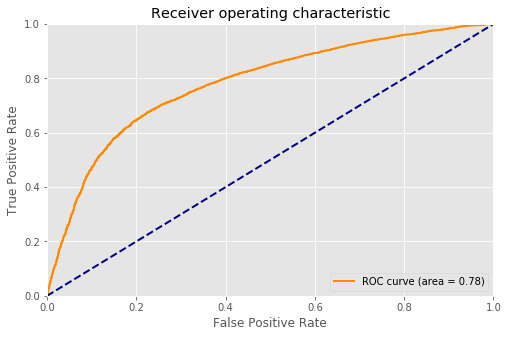

In [24]:
from sklearn.metrics import roc_curve, auc
score_roc = SVMGridSearch.decision_function(X_test)
fpr1, tpr1, thresholds = roc_curve(y_test, score_roc)
roc_auc1 = auc(fpr1, tpr1)
plt.figure(figsize=(8,5));
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [25]:
from sklearn import metrics as mt

clf_SVM = Pipeline(memory=None,
                   steps=[('scale',StandardScaler(copy=True, with_mean=True, with_std=True)),
                          ('clf',
                           SGDClassifier(alpha=0.01, average=False,
                           class_weight='balanced', early_stopping=False,
                           epsilon=0.1, eta0=0.0, fit_intercept=True,
                           l1_ratio=0.15, learning_rate='optimal',
                           loss='hinge', max_iter=1000, n_iter_no_change=5,
                           n_jobs=None, penalty='l2', power_t=0.5,
                           random_state=101, shuffle=True, tol=0.001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False))],verbose=False)

clf_SVM.fit(X_train,y_train)
yhatSVM = clf_SVM.predict(X_test)

total_accuracy_SVM = mt.accuracy_score(y_test, yhatSVM)*100
#Print out the results
print('SVM classifier accuracy with optimal parameters is: %.1f'%(total_accuracy_SVM))

SVM classifier accuracy with optimal parameters is: 72.5


In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, yhatSVM)

array([[4986, 1190],
       [2154, 3816]], dtype=int64)

### Model #2 KNN Classification Parameter Optimization with GridSearch

K-Nearest Neighbor (KNN) classification is valid option for this dataset since the dataset has been preprocessed and it has no missing values.  Parameter selections are critical to the performance of KNN classifiers; therefore, substantial time and effort was put forth to fully investigate the optimal parameters. 

##### Parameter Analysis:

*Algorithms:*  Algorithm used to compute the nearest neighbors can be ‘auto’matically determine the most appropriate algorithm to use for the given dataset/parameters, so it was left as default in our GridSearch

##### GridSearch Parameters:

*n_neighbors:* Number of neighbors to use in the analysis. Preliminary analyses were conducted to find a desired range of for number of neighbors. From these analyses, it was determined that the optimal number of neighbors is below 15. Above 15, the accuracy plateaus and start to decrease.

*Leaf_size:* The leaf size was adjusted, using: 10, 30, and 100 as the parameters. While there is an over-head penalty with using smaller leaves, accuracy may increase, so we will use it in our Grid Search.

*Metric:* How distance is measure between datapoints can be adjusted. The 2 options chosen were ‘minkowski’ and ‘euclidean’.

*Weights:* Both uniform and distance were looked at. ‘Uniform’ weight-all neighboring points get equal weight. ‘Distance’ weights points by the inverse of their distance.

*Predictor Variables:*  
Many of the predictor variable have different scaling, so to ensure all variables were treated equally in the analysis, all predictor variables are scaled to have a mean of 0 and Standard deviation of 1.

In [27]:
param_grid = [
    {
         'clf': [KNeighborsClassifier()],
         'clf__weights': ['uniform','distance'],
         'clf__leaf_size': [10,30],
         'clf__metric': ['minkowski','euclidean'],
         'clf__n_neighbors':[3,5,13],
         
    }
]

grid_search_KNN = GridSearchCV(pipe, param_grid=param_grid,cv=k_fold,n_jobs=-1, verbose=1, scoring='roc_auc' )

KNearest_model = grid_search_KNN.fit(X_train, y_train)

y_KNN_score = grid_search_KNN.predict(X_test)

y_KNN_prob=grid_search_KNN.predict_proba(X_test)

print(roc_auc_score(y_test, y_KNN_prob[:,1]))

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.5min finished


0.7656955980246657


In [28]:
classifierEstimaterKNN = KNearest_model.best_estimator_
classifierEstimaterKNN

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=10,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=13, p=2,
                                      weights='uniform'))],
         verbose=False)

The GridSearch algorithm determined the following optimal parameters for K-Neighbors model.

* Leaf-Size: 10  
* Number of Neighbors: 13

* Distance Matric: Minkowski  
* Weights: Uniform

In [29]:
KNearest_scores = EvaluateClassifierEstimator(classifierEstimaterKNN,X_train,y_train,cv=10)

The average accuracy for all cv folds is: 		 0.71282
The average precision for all cv folds is: 		 0.72323
The average recall for all cv folds is: 		 0.67461
*********************************************************


In [30]:
confusion_matrix(y_test.loc[:,['cardio']].values.ravel(), y_KNN_score)

array([[4550, 1626],
       [1903, 4067]], dtype=int64)

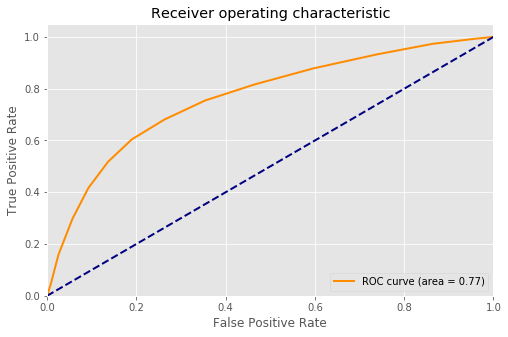

In [31]:
# Plot ROC Curve
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_KNN_prob[:,1] )
roc_auc2 = auc(fpr2, tpr2)

plt.figure(figsize=(8,5));
plt.plot(fpr2, tpr2, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Re-run the KNN classification analysis with the optimal algorithm parameters that were determined by the parameter GridSearch.

In [32]:

clf_knn = Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=10,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=13, p=2,
                                      weights='uniform'))],
         verbose=False)


clf_knn.fit(X_train,y_train)
yhatKNN = clf_knn.predict(X_test)

total_accuracy_KNN = mt.accuracy_score(y_test, yhatKNN)*100
#Print out the results
print('KNN classifier accuracy with optimal parameters is: %.1f'%(total_accuracy_KNN))

KNN classifier accuracy with optimal parameters is: 70.9


### Model #3 Random Forest

One of the most commonly used classifier techniques is random forest, due to its very low bias and general stability when it comes to classification. One method of optimizing a random forest model is to try different parameters to increase performance. Another method of doing so is by utilizing grid search to let random forest decide which combination of hyperparameters would be best implemented in your model. We chose this route as it saves both time and sanity when comparing so many different parameters.

We'll start with a baseline random forest for our starting position.

In [33]:
param_grid = [
    {
         'clf': [RandomForestClassifier()],
         'clf__n_estimators': [50, 100, 200, 500], 
         'clf__max_depth': [5,10,15,20,30],
         'clf__random_state':[101]
     }
]

grid_search_RF = GridSearchCV(pipe, param_grid=param_grid, cv=k_fold,n_jobs=-1, verbose=1, scoring='roc_auc' )

RandomForest_model = grid_search_RF.fit(X_train, y_train)

y_RF_score = grid_search_RF.predict(X_test)
y_RF_prob=grid_search_RF.predict_proba(X_test)

print(roc_auc_score(y_test, y_RF_prob[:,1]))

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  6.7min finished


0.7914344498832677


In [34]:
classifierEstimaterRF = RandomForest_model.best_estimator_
classifierEstimaterRF

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=10,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=500, n_jobs=None,
                                        oob_score=False, random_state=101,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [35]:
Random_Forest_scores = EvaluateClassifierEstimator(classifierEstimaterRF,X_train,y_train,cv=10)

The average accuracy for all cv folds is: 		 0.72916
The average precision for all cv folds is: 		 0.75756
The average recall for all cv folds is: 		 0.66131
*********************************************************


In [36]:
confusion_matrix(y_test, y_RF_score)

array([[4853, 1323],
       [1970, 4000]], dtype=int64)

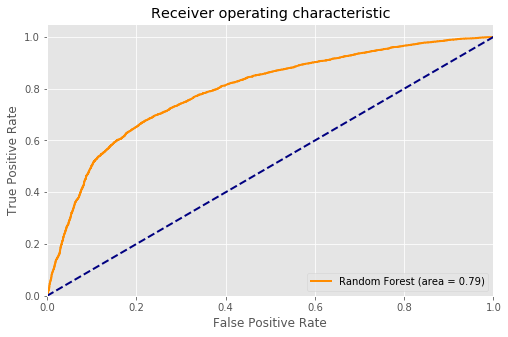

In [37]:
# create ROC cuve for Random Forest model:
fpr3, tpr3, thresholds = roc_curve(y_test, y_RF_prob[:,1] )
roc_auc3 = auc(fpr3, tpr3)

plt.figure(figsize=(8,5));
plt.plot(fpr3, tpr3, color='darkorange', lw=2, label='Random Forest (area = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [38]:
clf_RF = Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=10,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=500, n_jobs=None,
                                        oob_score=False, random_state=101,
                                        verbose=0, warm_start=False))], verbose=False)

clf_RF.fit(X_train,y_train)
yhatRF = clf_RF.predict(X_test)

total_accuracy_RF = mt.accuracy_score(y_test, yhatRF)*100
#Print out the results
print('Random Forest classifier accuracy with optimal parameters is: %.1f'%(total_accuracy_RF))

Random Forest classifier accuracy with optimal parameters is: 72.9


### Model #4: Bagging Method and Decision Tree Classifier

In [39]:
param_grid = [
    {
         'clf': [BaggingClassifier(DecisionTreeClassifier())],
         'clf__n_estimators':[50, 100, 200, 500],
         'clf__random_state':[101] 
     }
]


# # This will test the parameter dict against our 
# # pipeline

grid_searchDT = GridSearchCV(pipe, param_grid=param_grid, cv=k_fold,n_jobs=-1, verbose=1, scoring='roc_auc')


# # Here we are training the model, this is 
# # what takes the most amount of time to run
DT_model = grid_searchDT.fit(X_train, y_train)

y_DT_score = grid_searchDT.predict(X_test)
y_DT_prob = grid_searchDT.predict_proba(X_test)

print(roc_auc_score(y_test, y_DT_prob[:,1]))

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  5.3min finished


0.7415420420322684


In [40]:
classifierEstimaterDT = DT_model.best_estimator_
classifierEstimaterDT

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                         criterion='gini',
                                                                         max_depth=None,
                                                                         max_features=None,
                                                                         max_leaf_nodes=None,
                                                                         min_impurity_decrease=0.0,
                                                                         min_impurity_split=None,
                                                                         min_samples_leaf=1,
                                                                         min_samples_split=2,
         

In [41]:
DT_scores = EvaluateClassifierEstimator(classifierEstimaterDT,X_train,y_train,cv=10)

The average accuracy for all cv folds is: 		 0.69118
The average precision for all cv folds is: 		 0.68851
The average recall for all cv folds is: 		 0.68022
*********************************************************


In [42]:
confusion_matrix(y_test, y_DT_score)

array([[4267, 1909],
       [1878, 4092]], dtype=int64)

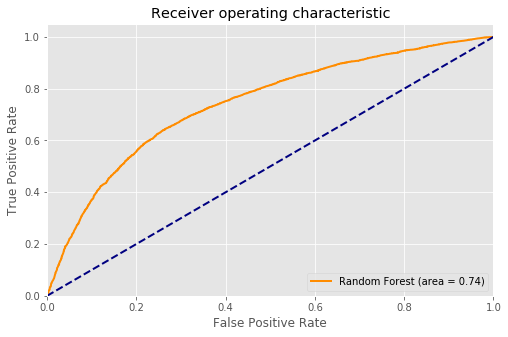

In [43]:
# create ROC curve for Random Forest model:
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_DT_prob[:,1] )
roc_auc4 = auc(fpr4, tpr4)

plt.figure(figsize=(8,5));
plt.plot(fpr4, tpr4, color='darkorange', lw=2, label='Random Forest (area = %0.2f)' % roc_auc4)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [44]:
clf_DT = Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                         criterion='gini',
                                                                         max_depth=None,
                                                                         max_features=None,
                                                                         max_leaf_nodes=None,
                                                                         min_impurity_decrease=0.0,
                                                                         min_impurity_split=None,
                                                                         min_samples_leaf=1,
                                                                         min_samples_split=2,
                                                                         min_weight_fraction_leaf=0.0,
                                                                         presort=False,
                                                                         random_state=None,
                                                                         splitter='best'),
                                   bootstrap=True, bootstrap_features=False,
                                   max_features=1.0, max_samples=1.0,
                                   n_estimators=500, n_jobs=None,
                                   oob_score=False, random_state=101, verbose=0,
                                   warm_start=False))],
         verbose=False)

clf_DT.fit(X_train,y_train)
yhatDT = clf_DT.predict(X_test)

total_accuracy_DT = mt.accuracy_score(y_test, yhatDT)*100
#Print out the results
print('Bagging Method and Decision Tree Classifier accuracy with optimal parameters is: %.1f'%(total_accuracy_DT))

Bagging Method and Decision Tree Classifier accuracy with optimal parameters is: 68.8


<a href="#top">Back to Top</a>
### Modeling and Evaluation 4<a id="Modeling_and_Evaluation_4"></a>
* Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.

The best model we found was Random Forest Classification, with a ROC/AUC score of ~.798. This is score lead to the conclusion that using this Random Forest Classification pipeline , could be used to accurately predict the expected valuation. Using this model to predict test set gives us 72.9% accuracy which is highest accuracy compared to other models.

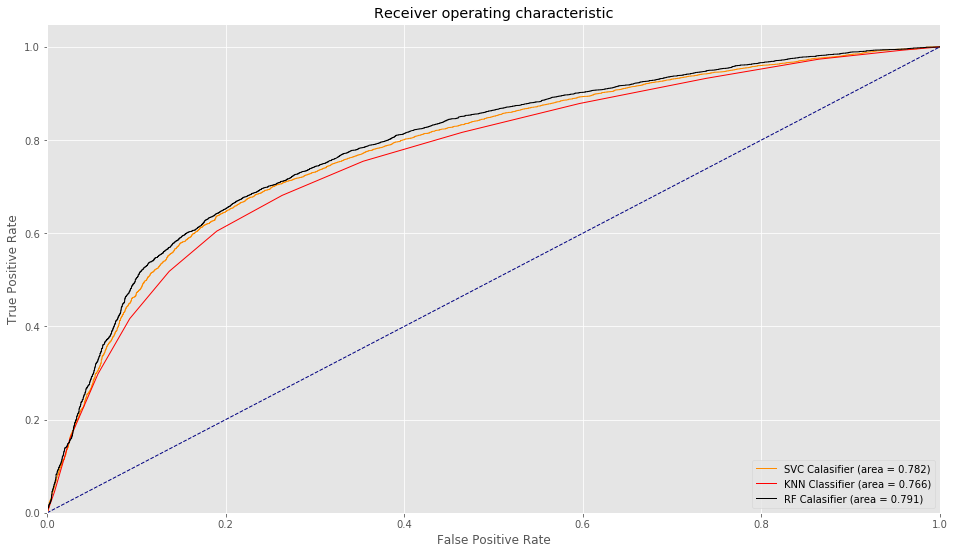

In [45]:
plt.figure(figsize=(16,9));
plt.plot(fpr1, tpr1, color='darkorange', lw=1, label='SVC Calasifier (area = %0.3f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='red', lw=1, label='KNN Classifier (area = %0.3f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='black', lw=1, label='RF Calasifier (area = %0.3f)' % roc_auc3)
#plt.plot(fpr4, tpr4, color='yellow', lw=1, label='DT Calasifier (area = %0.2f)' % roc_auc4)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

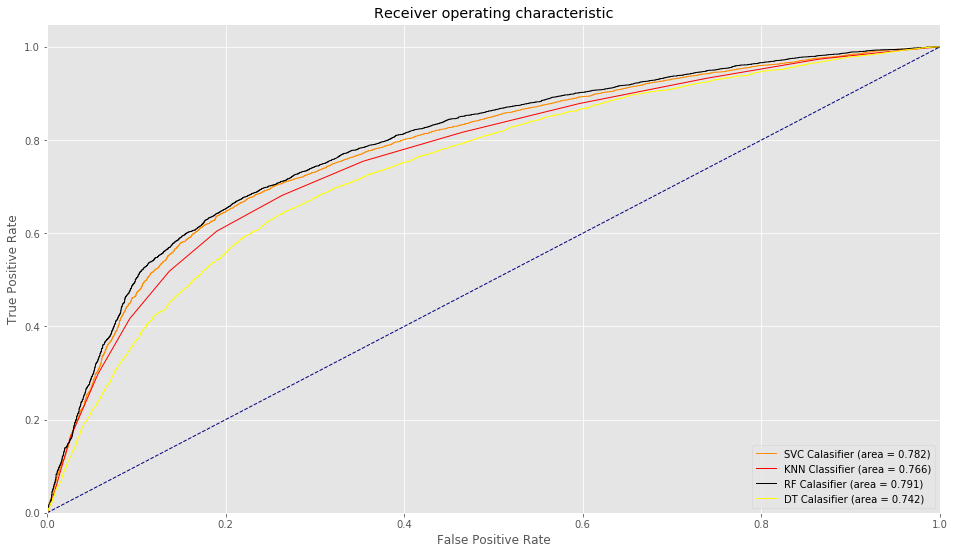

In [46]:
plt.figure(figsize=(16,9));
plt.plot(fpr1, tpr1, color='darkorange', lw=1, label='SVC Calasifier (area = %0.3f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='red', lw=1, label='KNN Classifier (area = %0.3f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='black', lw=1, label='RF Calasifier (area = %0.3f)' % roc_auc3)
plt.plot(fpr4, tpr4, color='yellow', lw=1, label='DT Calasifier (area = %0.3f)' % roc_auc4)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

<a href="#top">Back to Top</a>
### Modeling and Evaluation 5<a id="Modeling_and_Evaluation_5"></a>
* Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.

Models we implemented: 

1.  **SVM**<br>
        Advantage: 
            -Can handle large number of dimensions. 
            -Many kernels to choose from. 
            -Fairly robust against overfitting. 
        Disadvantage:
            -Memory intensive and time consuming.
            -Parameterization is hard.  

2. **K-Nearest Neighbor**<br>
        Advantage:
            -Model does not need to be trained and incremental learning is done when new data is fed in. 
        Disadvantage:
            -Does not handle large number of dimensions.
            -Weighing of attributes needs to be done. Additional work.
            -memory intensive. 
            
3. **Random Forest** <br>
        Advantage: 
            -Robust to overfitting. 
            -Performs well with large number of features.
        Disadvantage: 
            -Learning is slow and integration to improve generated models is not possible. 

# Statistical Comparison of Classifiers: 

in case image doesn't show, equations restated: 

$$\sigma^2 = \frac{e(1-e)}{n}$$ 

$$CI = (e_1-e_2)+-1.96\sqrt{(\sigma_1^2+\sigma_2^2)}$$


## Comparison of SAT Models: 
### Compute variance for each model we are comparing

##### SVM error and variance
$\sigma^2 = \frac{e(1-e)}{n}$ <br><br>
$e =.28$<br><br>
$\frac{(.28)(1-.28)}{12146} = {(1.66) 10^-5}$<br><br>

##### K-Nearest Neighbor error and variance
$\sigma^2 = \frac{e(1-e)}{n}$ <br><br>
$e = .29$ <br><br>
$\frac{(.29)(1-.29)}{12146} =  {(1.7) 10^-5}$<br><br>
    
##### Random Forest error and variance
$\sigma^2 = \frac{e(1-e)}{n}$ <br><br>
$e =.27$<br><br>
$\frac{(.27)(1-.27)}{12146} = {(1.62) 10^-5}$<br><br>

 #### Bagging Model error and variance
$\sigma^2 = \frac{e(1-e)}{n}$ <br><br>
$e =.31$<br><br>
$\frac{(.31)(1-.31)}{12146} = {(1.76) 10^-5}$<br><br>

### Compute Confidence intervals of various models

##### SVM compared to K-Nearest Neighbor
$(.28-.29)\pm1.96\sqrt{((1.66) 10^-5+(1.7) 10^-5} = [-0.0236, 0.0013]$<br>
Our confidence interval does contain 0 so we are 95% confident that these two models are the same.<br>

#####  SVM compared to Random Forest
$(.28-.27)\pm1.96\sqrt{((1.66) 10^-5+(1.62) 10^-5)} = [0.0012, 0.021]$<br>
Our confidence interval does not contain 0 so we are 95% confident that these two models are not the same.<br>

#####  SVM compared to Decision Tree
$(.28-.31)\pm1.96\sqrt{((1.66) 10^-5+(1.76) 10^-5)} = [-0.041, -0.018]$<br>
Our confidence interval does not contain 0 so we are 95% confident that these two models are not the same.<br>

##### K-Nearest compared to Random Forest
$(.29-.27)\pm1.96\sqrt{(1.62) 10^-5)+(1.7) 10^-5} = [0.0087, 0.0312]$<br>
Our confidence interval does not contain 0 so we are 95% confident that these two models are not the same.<br>

##### K-Nearest compared to Decision Tree
$(.29-.31)\pm1.96\sqrt{((1.62) 10^-5)+(1.76) 10^-5)} = [-0.031, -0.0086]$<br>
Our confidence interval does not contain 0 so we are 95% confident that these two models are not the same.<br>

##### Random Forest compared to Decision Tree
$(.27-.31)\pm1.96\sqrt{((1.7) 10^-5+(1.76) 10^-5)} = [-0.051, -0.028]$<br>
Our confidence interval does not contain 0 so we are 95% confident that these two models are not the same.<br>


<a href="#top">Back to Top</a>
### Modeling and Evaluation 6<a id="Modeling_and_Evaluation_6"></a>
* Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.

We found out Random Forest classifier has the best performance on cardio in CVD dataset. Now, we proceed to find the Level of importance of each feature in this model.

Whit this process we are trying to select those features that contribute most to the outcome we are trying to predict.   automatically. 

The benefits of feature selection include reduce overfitting, improving accuracy and minimizing computing time and putting irrelevant features in the model can decrease the accuracy of the models. 

* All features are scaled in the model.
* The coefficient values indicate the level of feature influence on model performance, higher value means stronger influence and importance.
* The influence values are sorted and top 20 features with strongest influences are plotted.

<a href="#top">Back to Top</a>
### Deployment<a id="Deployment"></a>
* How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would you deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?

<a href="#top">Back to Top</a>
### Exceptional Work<a id="Exceptional_Work"></a>
* You have free reign to provide additional analyses. One idea: grid search parameters in a parallelized fashion and visualize the performances across attributes. Which parameters are most significant for making a good model for each classification algorithm?

We will be looking at a Voting Classifier. Voting is one of the easyest ways of combining the predictions from multiple machine learning algorithms. Voting classifier isn’t an actual classifier but it wraps up different ones that are trained and valuated in parallel in order to look at the different uniqueness of each system. We will use and ensemble of different algorithms then predict the final output.

This output on a prediction is taken by majority vote according to two different strategies:

* Hard voting / Majority voting: Hard voting is the simplest case of majority voting. In this case, the class that received the highest number of votes will be chosen.
Or
* Soft Voting / Average probability: The probability vector for each predicted class are summed and the average is collected. The winning class is the one with the highest value.

We will use both hard voting and soft voting.

In [50]:
from sklearn.ensemble import VotingClassifier

#Credit
#https://medium.com/@sanchitamangale12/voting-classifier-1be10db6d7a5
# and georgesturrock
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import model_selection

seed = 7
# prepare models
class_models = []
class_models.append(('LDA', LinearDiscriminantAnalysis(n_components=2, priors=None, solver='lsqr')))
class_models.append(('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski', 
                                           metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                                           weights='uniform')))
class_models.append(('RF', RandomForestClassifier(n_estimators=600, max_depth=None, min_samples_split=2, random_state=0, n_jobs=-1)))
class_models.append(('RFET', ExtraTreesClassifier(n_estimators=600, max_depth=None, min_samples_split=2, random_state=0, n_jobs=-1)))

# A note on Pickling:
# Pickling allows you to save a python object as a binary file on your hard drive.
# After you pickle your object, you can kill your python session, reboot your computer if you want,
# and later load your object into python again.
# https://ianlondon.github.io/blog/pickling-basics/

# Save pandas data frames as pickles
df.to_pickle("./data/df.pkl")
# Read pandas data frames as pickles
dfp = pd.read_pickle("./data/df.pkl")

# Create Analysis Data Sets
X = dfp[features].copy()
y = dfp[['cardio']].copy()

### Majority Rules 'Hard' Voting

In [51]:
vclf = VotingClassifier(class_models,  voting='hard')
acc = model_selection.cross_val_score(vclf, X, y, cv=StratifiedKFold(n_splits=10, random_state=seed), scoring="accuracy")
print(acc)
print("Mean Accuracy:", np.mean(acc))

[0.71188673 0.71513255 0.71842582 0.72122509 0.70360613 0.71529722
 0.71150996 0.71245059 0.70998024 0.7122859 ]
Mean Accuracy: 0.7131800235468833


### Average Probability 'Soft' Voting

In [49]:
vclf = VotingClassifier(class_models,  voting='soft')
acc = model_selection.cross_val_score(vclf, X, y, cv=StratifiedKFold(n_splits=10, random_state=seed), scoring="accuracy")
print(acc)
print("Mean Accuracy:", np.mean(acc))

[0.70826473 0.70986333 0.71480323 0.71315659 0.69916022 0.71348592
 0.71019266 0.710639   0.70108696 0.70602767]
Mean Accuracy: 0.7086680304443973


Looking at the results of the voting model we can see that both scored less than our others.